# Section 1. Import necessary package and get data


In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics
### regression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


### classification
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:

train = pd.read_csv('/Users/linyiqi/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/Squarepoint-Data-Interview/train_loan.csv')
train_y = train["Loan_Status"]
train_x = train.drop("Loan_Status",axis = 1)
test = pd.read_csv("/Users/linyiqi/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/Squarepoint-Data-Interview/test_loan.csv")
print("shape of train is {}".format(train_X.shape))
#print("shape of trest is {}".format(test.shape))
print("Name of Column {}".format(train_X.columns))

# Section 2 EDA

In [ ]:
## install EDA package/ install lightGBM
#! conda install -c conda-forge lightgbm
import lightgbm as LBGM
from ydata_profiling import ProfileReport ## For EDA
profile = ProfileReport(train, title="Profiling Report")
profile

## 步骤
 EDA 之后，先查看那些列的NA是大概率missing at random 而且不能impute missing data的， 我们drop这些列first.

In [ ]:
## Missing Machenism understanding
# ! pip install missingno
import missingno as msno
msno.dendrogram(train)
msno.heapmap(train)

In [ ]:
# drop NA that make no sense.
colnames_NA = ["ID","X"]
train_x = train_x.dropna(subset = colnames_NA)
test_x = test_x.dropna(subset = colnames_NA)


In [ ]:
# impute missing by groupby and fillna by median
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
## impute constant
## 一列一列单独 imputena as consant


## Section 2.1 Problem listing and impute data for whole dataset


In [ ]:
## Missing Machenism understanding
# ! pip install missingno
import missingno as msno
msno.dendrogram(train)
msno.heapmap(train)

In [ ]:
## Binary 
from sklearn.preprocessing import LabelEncoder
train_y = LabelEncoder().fit_transform(train_y)

## Feature Engerning 


In [ ]:
## Getting all varible into together
ntrain = train_x.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train_x, test)).reset_index(drop=True)

print("all_data size is : {}".format(all_data.shape))
##

In [ ]:
# skewed data transformation
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

# Then box-cox transformation
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

# Section 3 graph


In [63]:
map = {"Yes":1,"No":0}
train.Married = train["Married"].apply(lambda x:map[x])
train.head(10)
#or

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

##

## Process categorical data: # process columns, apply LabelEncoder to categorical features
Cate_names = ["Gender","Education","Self_Employed","Property_Area"] ## ordinal data

for data in combine: ## here combine = [train_X,test_X]
    for c in Cate_names:
        lbl = LabelEncoder() ## 转化为整数: 0,1,2,3,....但是实际上应该是用one-hot 编码对于类别数比较大的
        lbl.fit(list(data[c].values))
        all_data[c] = lbl.transform(list(all_data[c].values))

## For real real categorical data. we use
all_data = pd.get_dummies(all_data)
# new
train_x = all_data[:ntrain]
test_x = all_data[ntrain:]





IndentationError: expected an indented block (689215155.py, line 12)

# Section 3 graph


In [ ]:
## chuck for remark correlation plot with  sns

sns.set_theme(style="white")
# Generate a large random dataset

# Compute the correlation matrix
corr = train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
## Missing Machenism understanding
# ! pip install missingno
import missingno as msno
msno.dendrogram(train)
msno.heapmap(train)

NameError: name 'All_data' is not defined

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

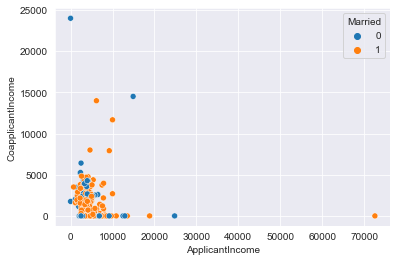

In [62]:
#train.drop(columns=["Loan_ID"],inplace=True,axis= 0 )
df = train.copy(deep= True).dropna()
#df.drop(columns=["Loan_ID"],inplace=True,axis= 0)
df.drop(columns=['Loan_ID'],axis= 0,inplace= True)
print(df.columns)
df["inter_Married_income"] = df["ApplicantIncome"]*df["Married"]
sns.scatterplot(data = df,x = "ApplicantIncome",hue = "Married",y = "CoapplicantIncome")
#sns.regplot(data = df, x = "inter_Married_income",y = "CoapplicantIncome") It verified is not right

In [ ]:
## Missing Machenism understanding
# ! pip install missingno
import missingno as msno
msno.dendrogram(train)
msno.heapmap(train)

# Section 3 graph


# Modelling


In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# import xgboost as xgb
import lightgbm as lgb

## Trying to use three base model for
## Lasso/elastic net + SVR +lightGBM  (Using as ensemble)

Write down the cross-validation method for dealling with modelling.

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=017).get_n_splits(train_x.values)
    rmse= np.sqrt(-cross_val_score(model, train_x.values, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
# Basemodel adhoc model with explicit tuning setting. Maybe we should use the more advance method (CV/GCV) to conducting with this.
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=017))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5) # huber loss to be more robust
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
SVRreg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [ ]:
# For a given tuning parameter
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# This function provide the result with a specific solution.

## Here is the golden Standard to use GridrandomSearchCV to have the result and sequentail learning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet, Lasso
step = [('process',RobustScaler()),("lasso",Lasso())] # If correlation is strong, using Enet
lasso =Pipeline(step)
params_lasso  = {"lasso__alpha": np.arange(0,0.5,0.01)}
## check lasso.get_params().keys() for alpha is valid or not

Grid_lasso  = RandomizedSearchCV(estimator=lasso,param_distributions = params_lasso,scoring='neg_mean_absolute_error', cv=5,verbose=False)
Grid_lasso.fit(train,y_train)
print(Grid_lasso.best_score_,Grid_lasso.best_params_)
Residual = y_train-Grid_lasso.predict(train)

In [ ]:
from sklearn.svm import SVR
SVR_pip = Pipeline([('process',RobustScaler()),("SVR",SVR())])
SVR_pip.get_params().keys()

In [ ]:
params_SVR  = {"SVR__C": np.arange(0,10,0.1),"SVR__kernel":["rbf","linear","polynomial"],"SVR__epsilon":np.arange(0,10,0.1)}
Grid_SVR  = RandomizedSearchCV(estimator=SVR_pip,param_distributions = params_SVR,scoring='neg_mean_absolute_error', cv=5,verbose=False)
Grid_SVR.fit(train,Residual)
print(Grid_SVR.best_score_,Grid_SVR.best_params_)
Residual_2 = Residual-Grid_SVR.predict(train)

In [ ]:
import lightgbm as lgb
LGB = lgb.LGBMRegressor(objective='regression',
                        max_bin = 55, bagging_fraction = 0.8,
                        bagging_freq = 5, feature_fraction = 0.2319,
                        feature_fraction_seed=9, bagging_seed=9,
                        min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
LGB.get_params().keys()

In [ ]:
params_LGB  = {"num_leaves": np.arange(1,20,1),
               "learning_rate":np.arange(0.01,0.5,0.01), 'n_estimators': np.arange(100,2000,100)}
## check SVR_pip.get_params().keys() for alpha is valid or not
Grid_LGB  = RandomizedSearchCV(estimator=LGB,param_distributions = params_LGB,scoring='neg_mean_absolute_error', cv=5,verbose=False)
Grid_LGB.fit(train,Residual_2)
print(Grid_LGB.best_score_,Grid_LGB.best_params_)

In [ ]:
## Evaluated in training set
predict_y_train =Grid_lasso.predict(test)+Grid_SVR.predict(test)+Grid_LGB.predict(test)

## Sequential Learning
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(predict_y_train,train_y.values)))
prediction = pd.DataFrame({"Predict_Y":predict_y_train,"Expected_Y":train_y.values)})

sns.regplot(data = prediction,x ="Expected_Y",y ="Predict_Y")

In [ ]:
## chuck for remark correlation plot with  sns

sns.set_theme(style="white")
# Generate a large random dataset

# Compute the correlation matrix
corr = train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

AttributeError: module 'missingno' has no attribute 'heapmap'

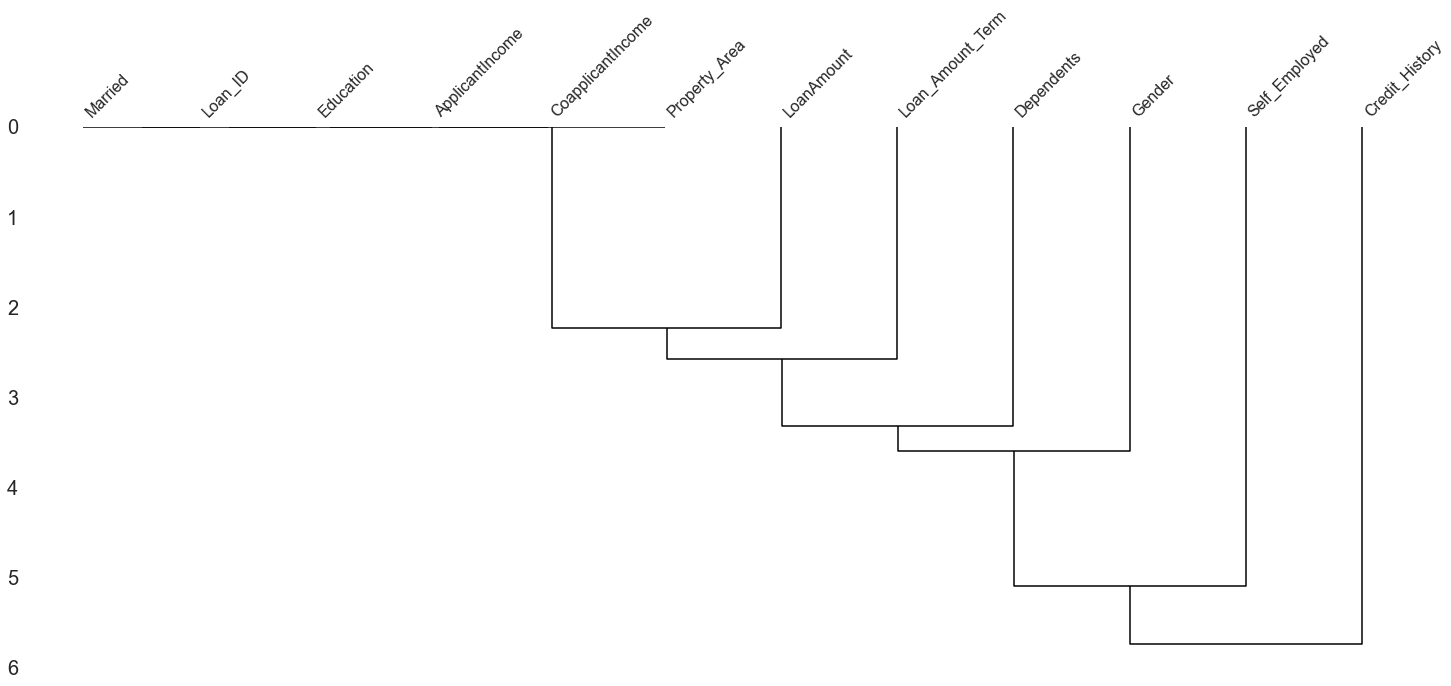

In [8]:
## Missing Machenism understanding
# ! pip install missingno
import missingno as msno
msno.dendrogram(train)
msno.heapmap(train)

# Section 3 graph


In [ ]:
## chuck for remark correlation plot with  sns

sns.set_theme(style="white")
# Generate a large random dataset

# Compute the correlation matrix
corr = train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Plot important coefficients regression / example is lasso fitting
## try to use sns to draw the picture

coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()